In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# df1=pd.read_csv('world_bank_dataset.csv', skiprows=4)
# df2=pd.read_csv('GDP.csv', skiprows=4)
# df_concat = pd.concat([df1, df2], axis=0)
# df_concat.to_csv('world_bank_dataset.csv', index=False)



In [61]:

def remove_missing_features(df):
    
    # validation for dataframe
    if df is None:
        print("No DataFrame received!")
        return
    
    # create a copy of the dataframe to avoid changing the original
    df_cp=df.copy()
        
    # find features with non-zero missing values
    n_missing_vals=df.isnull().sum()

    # get the index list of the features with non-zero missing values
    n_missing_index_list = list(n_missing_vals.index)
  
    # here missing_percentage consists of key value pairs - column name: percentage of missing values
    missing_percentage = n_missing_vals[n_missing_vals!=0]/df.shape[0]*100
    
    # list to maintain the columns to drop
    cols_to_trim=[]
    
    # iterate over each key value pair
    for i,val in enumerate(missing_percentage):
        # if percentage value is > 75
        if val > 75:
            # add the corresponding column to the list of cols_to_trim
            cols_to_trim.append(n_missing_index_list[i]) 

    if len(cols_to_trim) > 0:
        print("Dropped Columns:" + str(cols_to_trim[2:]))
    else:
        print("No columns dropped")

    # return the updated dataframe
    return cols_to_trim[2:]

In [62]:
def read_world_bank_data(filename):
    # Read CSV file into a Pandas dataframe
    df = pd.read_csv(filename)
    
    # Remove unnecessary columns
    df = df.drop(columns=['Indicator Code', 'Unnamed: 66', 'Country Code'])
    
    # Rename the columns for convenience
    df = df.rename(columns={'Country Name': 'country_name',
                            'Indicator Name': 'indicator_name'})
    
    # drop column with more than 75% missing values
    cols_to_trim = remove_missing_features(df)
    df = df.drop(columns=cols_to_trim)
    
    # take mean by row where values are NaN
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=1)
    
    # Melt the dataframe to get years as rows
    df_melted = df.melt(id_vars=['country_name', 'indicator_name'],
                        var_name='year', value_name='value')
    
    # Pivot the dataframe to have years as columns
    df_years = df_melted.pivot(index=['country_name', 'indicator_name'],
                               columns='year', values='value')
        
    # Reset the index
    df_years = df_years.reset_index()
    
    # Pivot the dataframe to have countries as columns
    df_countries = df_melted.pivot(index=['indicator_name', 'year'],
                                   columns='country_name', values='value')

    
    # Reset the index
    df_countries = df_countries.reset_index()
    
    return df_years, df_countries


In [63]:
def find_the_stats(indicator_name):
    # Read in the data using the function we created earlier
    df_years, df_countries = read_world_bank_data('world_bank_dataset.csv')

    # Select the countries and indicators we want to analyze
    countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'South Africa', 'Australia', 'Mexico', 'Canada', 'France']
    indicators = [indicator_name]

    # Subset the dataframes to only include the selected countries and indicators
    df_countries_subset = df_countries[df_countries['indicator_name'].isin(indicators)][countries]
    df_years_subset = df_years[df_years['country_name'].isin(countries)][['country_name']]

    # Compute summary statistics for the selected indicators
    indicators_stats = df_countries_subset.describe().transpose()

    # Compute correlation coefficients between the selected indicators
    indicators_corr = df_countries_subset.corr()

    return indicators_stats, indicators_corr
    

# ['CO2 emissions (kt)', 'CO2 emissions (kg per PPP $ of GDP)', 'Arable land (% of land area)', 'Forest area (sq. km)', 'Electric power consumption (kWh per capita)', 'Access to electricity (% of population)',
#             'Energy use (kg of oil equivalent per capita)', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']

In [64]:
indicators_stats, indicators_corr = find_the_stats('CO2 emissions (kt)')
print('Summary statistics for the selected indicator:')
indicators_stats


Dropped Columns:['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '2019']
Summary statistics for the selected indicator:


,count,mean,std,min,25%,50%,75%,max
country_name,,,,,,,,
United States,52.0,5.293109e+06,2.546752e+05,4.807500e+06,5.146583e+06,5.293109e+06,5.317859e+06,5.775810e+06
China,52.0,5.862607e+06,2.251282e+06,2.173360e+06,4.264448e+06,5.862607e+06,6.006323e+06,1.050293e+07
Brazil,52.0,3.396914e+05,6.872843e+04,1.979000e+05,3.189750e+05,3.396914e+05,3.396914e+05,5.116200e+05
Nigeria,52.0,9.433862e+04,8.157323e+03,7.277000e+04,9.213250e+04,9.433862e+04,9.581000e+04,1.148300e+05
India,52.0,1.290567e+06,4.395714e+05,5.635800e+05,1.005190e+06,1.290567e+06,1.290567e+06,2.451930e+06
Germany,52.0,8.175731e+05,4.887551e+04,7.077000e+05,8.114025e+05,8.175731e+05,8.310550e+05,9.553100e+05
Japan,52.0,1.172242e+06,3.363864e+04,1.090530e+06,1.169733e+06,1.172242e+06,1.174332e+06,1.262780e+06
South Africa,52.0,3.500338e+05,5.540080e+04,2.388200e+05,3.453553e+05,3.500338e+05,3.798400e+05,4.479300e+05
Australia,52.0,3.460490e+05,3.340515e+04,2.636300e+05,3.460490e+05,3.460490e+05,3.704750e+05,3.952900e+05


In [65]:
print('\nCorrelation coefficients between the selected indicator:')
indicators_corr


Correlation coefficients between the selected indicator:


country_name,United States,China,Brazil,Nigeria,India,Germany,Japan,South Africa,Australia,Mexico,Canada,France
country_name,,,,,,,,,,,,
United States,1.000000,-0.258061,-0.097938,-0.050280,-0.297862,0.040560,0.381986,-0.000020,0.245425,0.108599,0.266489,0.642962
China,-0.258061,1.000000,0.949369,0.567532,0.979616,-0.931970,0.376424,0.950838,0.848032,0.918127,0.837425,-0.771236
Brazil,-0.097938,0.949369,1.000000,0.695148,0.950475,-0.913981,0.522020,0.933741,0.865856,0.922700,0.881967,-0.695307
Nigeria,-0.050280,0.567532,0.695148,1.000000,0.649254,-0.541710,0.443532,0.538591,0.459130,0.508382,0.590862,-0.486601
India,-0.297862,0.979616,0.950475,0.649254,1.000000,-0.928440,0.307566,0.911653,0.811262,0.872570,0.821569,-0.819277
Germany,0.040560,-0.931970,-0.913981,-0.541710,-0.928440,1.000000,-0.371769,-0.926296,-0.918098,-0.935876,-0.898141,0.671380
Japan,0.381986,0.376424,0.522020,0.443532,0.307566,-0.371769,1.000000,0.470580,0.502372,0.545923,0.581466,-0.025607
South Africa,-0.000020,0.950838,0.933741,0.538591,0.911653,-0.926296,0.470580,1.000000,0.943680,0.971773,0.929199,-0.590943
Australia,0.245425,0.848032,0.865856,0.459130,0.811262,-0.918098,0.502372,0.943680,1.000000,0.973873,0.964384,-0.397748


In [66]:
df_years, df_countries = read_world_bank_data('world_bank_dataset.csv')

Dropped Columns:['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '2019']


In [67]:
def filter_df(indicator_name,df):

    countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'South Africa', 'Australia', 'Mexico', 'Canada', 'France']
    df_filtered = df.loc[df['indicator_name'] == indicator_name]

    # drop column indicator_name
    df_filtered = df_filtered.drop(columns='indicator_name')

    # set country_name as index
    df_filtered = df_filtered.set_index('country_name')

    return df_filtered


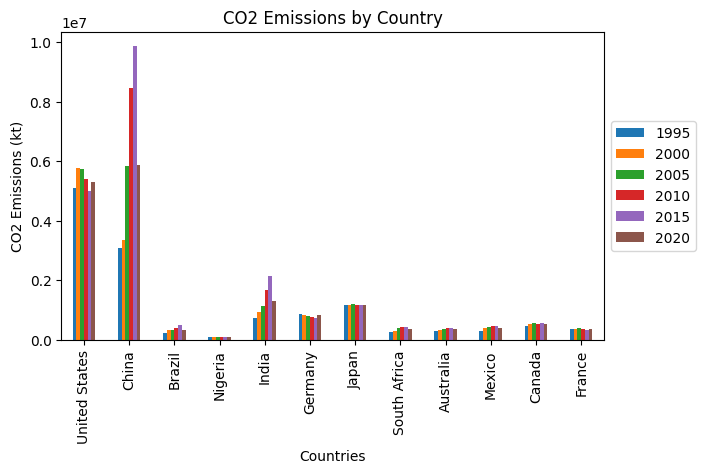

In [92]:
df_filtered = filter_df('CO2 emissions (kt)',df_years)
# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]

# Select the rows corresponding to the desired countries
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'South Africa', 'Australia', 'Mexico', 'Canada', 'France']
df_countries = df.loc[countries]

# Plot the bar graph
ax = df_countries.plot(kind='bar', figsize=(7,4))
ax.set_xlabel('Countries')
ax.set_ylabel('CO2 Emissions (kt)')
ax.set_title('CO2 Emissions by Country')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


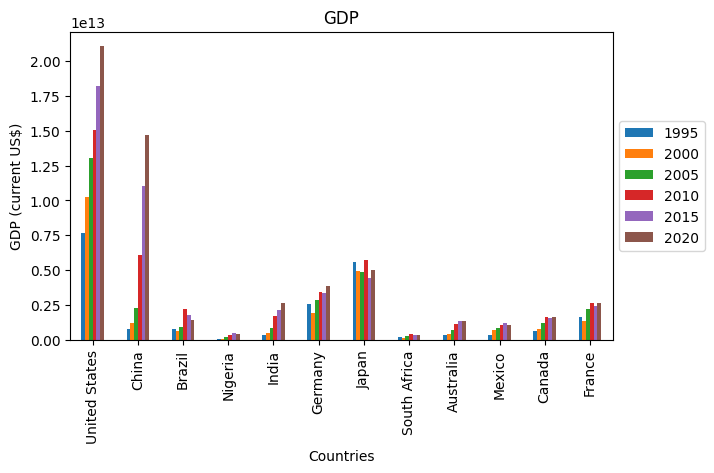

In [91]:
df_filtered = filter_df('GDP (current US$)',df_years)
# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]

# Select the rows corresponding to the desired countries
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'South Africa', 'Australia', 'Mexico', 'Canada', 'France']
df_countries = df.loc[countries]

# Plot the bar graph
ax = df_countries.plot(kind='bar', figsize=(7,4))
ax.set_xlabel('Countries')
ax.set_ylabel('GDP (current US$)')
ax.set_title('GDP')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

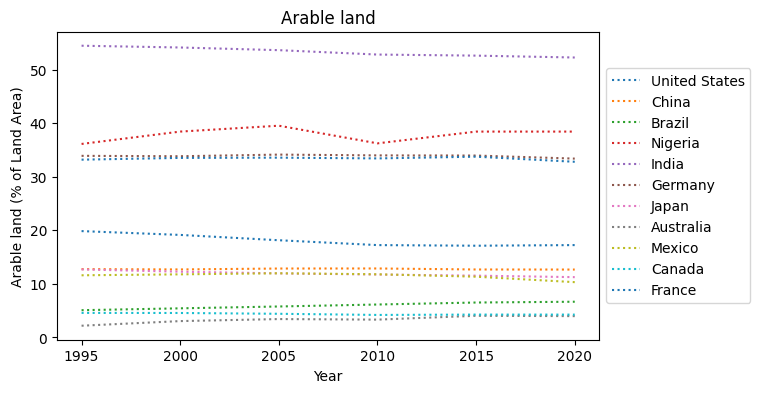

In [90]:
df_filtered = filter_df('Arable land (% of land area)',df_years)

# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]


# Create a dictionary to store the data
data = {}
for country in countries:
    data[country] = list(df_filtered.loc[country, years])

# Create the plot
plt.figure(figsize=(7,4))
for country in countries:
    plt.plot(years, data[country], linestyle=':', label=country)

plt.title('Arable land')
plt.xlabel('Year')
plt.ylabel('Arable land (% of Land Area)')

# Place the legend outside the graph area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


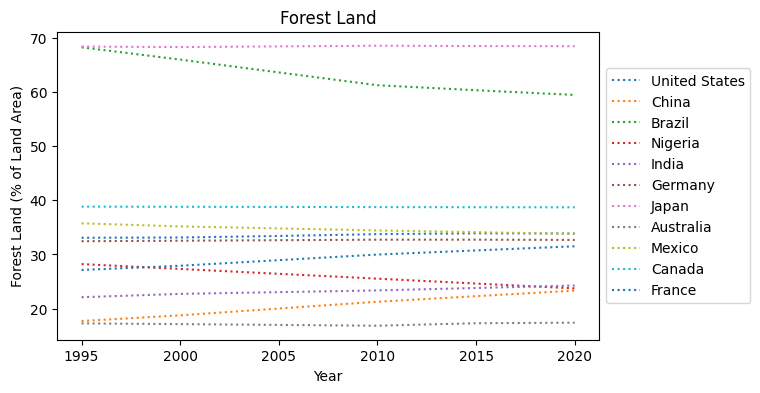

In [89]:
df_filtered = filter_df('Forest area (% of land area)',df_years)

# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]

# Create a dictionary to store the data
data = {}
for country in countries:
    data[country] = list(df_filtered.loc[country, years])

# Create the plot
plt.figure(figsize=(7,4))
for country in countries:
    plt.plot(years, data[country], linestyle=':', label=country)

plt.title('Forest Land')
plt.xlabel('Year')
plt.ylabel('Forest Land (% of Land Area)')

# Place the legend outside the graph area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

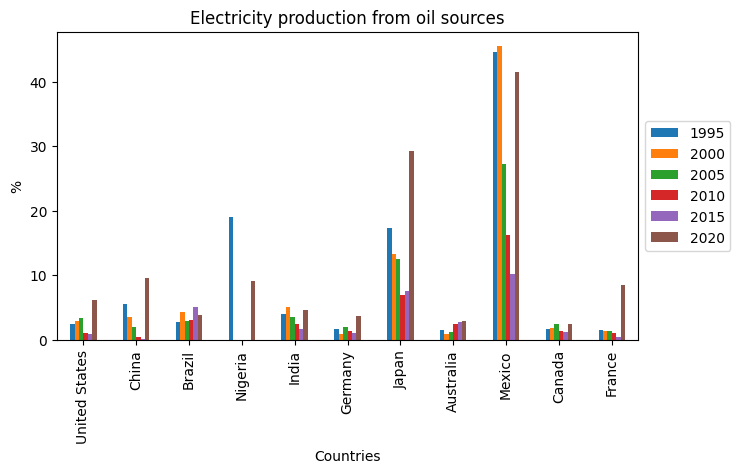

In [87]:
df_filtered = filter_df('Electricity production from oil sources (% of total)',df_years)
# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]

# Select the rows corresponding to the desired countries
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'Australia', 'Mexico', 'Canada', 'France']
df_countries = df.loc[countries]

# Plot the bar graph
ax = df_countries.plot(kind='bar', figsize=(7.5,4))
ax.set_xlabel('Countries')
ax.set_ylabel('%')
ax.set_title('Electricity production from oil sources')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


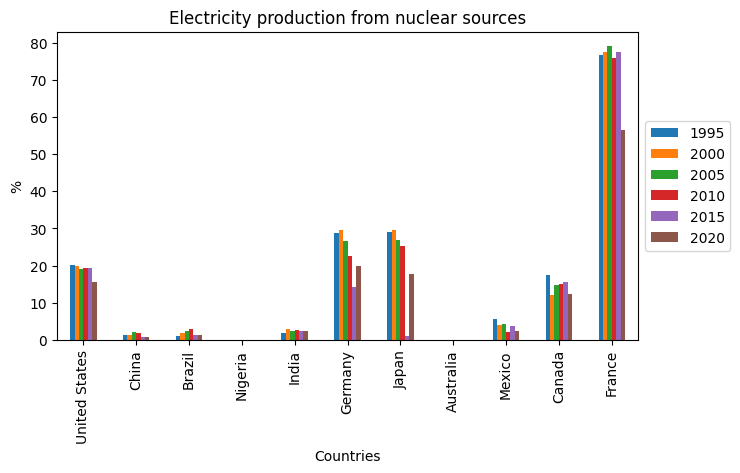

In [88]:
df_filtered = filter_df('Electricity production from nuclear sources (% of total)',df_years)
# Filter the dataframe for the desired years
years = ['1995', '2000', '2005', '2010', '2015', '2020']
df = df_filtered[years]

# Select the rows corresponding to the desired countries
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'India', 'Germany', 'Japan', 'Australia', 'Mexico', 'Canada', 'France']
df_countries = df.loc[countries]

# Plot the bar graph
ax = df_countries.plot(kind='bar', figsize=(7.5,4))
ax.set_xlabel('Countries')
ax.set_ylabel('%')
ax.set_title('Electricity production from nuclear sources')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
data=pd.read_csv('world_bank_dataset.csv')
data['Indicator Name'].value_counts().index.to_list()